# Desafio parte 2, 
## Team 2: Francisco de Asis dos Santos Silva, Josué Marinho Hinrichs and Leidy Milena Leal Abril



In this notebook, we use machine learning to create a model with the ability of classifying text of the financial sector as positive, negative or neutral sentiments. In the first section, we shall show the exploratory analysis of data including the information of dataset, verification of missing or repeated values, sentiments distributions and the words more commons. Also, we shall plot figures corresponding. In the second part, we shall clean up data carrying out tokenization and removing the stop words. 


We import the library and packages:

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/leidy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/leidy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/leidy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

We import the dataset used to train the model:

In [2]:
dataset = pd.read_csv('./data.csv')
dataset.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## a) Exploratory analysis

#### - Initial analysis of data:
We use info() to obtain the total number of columns and raws as well as the type:

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


#### - Verifying missing values. 
If there are some missing values we shall remove the corresponding row in the next item.

In [4]:
valores_faltantes = dataset.isnull().sum()
print(valores_faltantes)

Sentence     0
Sentiment    0
dtype: int64


#### - Description of data:
We use describe() to obtain information more detailed about the dataset:

In [5]:
dataset.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


#### - Verifying repeated rows?
If there are repeated rows we shall remove in the next section.

In [6]:
duplicates=dataset.duplicated(keep=False)
duplicate_rows=dataset[duplicates]
duplicate_rows

,Sentence,Sentiment
629,Proha Plc ( Euronext :7327 ) announced today (...,neutral
815,SSH Communications Security Corporation is hea...,neutral
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2234,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
2553,The issuer is solely responsible for the conte...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3079,The company serves customers in various indust...,neutral
3272,The company serves customers in various indust...,neutral
3353,The report profiles 614 companies including ma...,neutral


#### - Sentiments distribution:
We count the type of sentiments and determine the percentage of each sentiment. Also, we plot a histogram to show the results:

/tmp/ipykernel_105894/1824531122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure=sns.countplot(x=dataset['Sentiment'],order=dataset['Sentiment'].value_counts(ascending=False).index,palette="CMRmap_r",saturation=0.9)


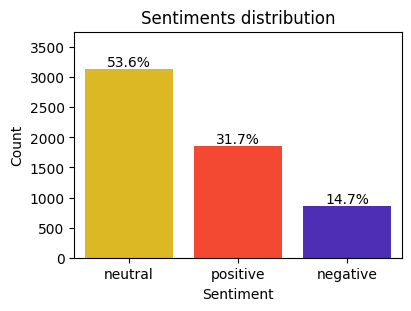

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [7]:
fig=plt.figure(figsize=(4,3),constrained_layout=True)
#c=sns.countplot(x='Sentiment', data=dataset,palette="CMRmap_r",saturation=1)
figure=sns.countplot(x=dataset['Sentiment'],order=dataset['Sentiment'].value_counts(ascending=False).index,palette="CMRmap_r",saturation=0.9)
total=dataset['Sentiment'].count()
for i in range(3):
    figure.bar_label(figure.containers[i],fmt=lambda x: f'{(x/total)*100:0.1f}%')
figure.margins(y=0.2)
figure.set(xlabel='Sentiment',ylabel='Count',title='Sentiments distribution')
plt.savefig('Sentiments_distribution.png',dpi=300)
plt.show()

dataset['Sentiment'].value_counts()

#### Exploring the length of texts (string):
We obtain statistical information about the first column i.e about 'Sentences':

In [8]:
dataset['length_text'] = dataset['Sentence'].apply(len)
dataset['length_text'].describe()

count    5842.000000
mean      117.020712
std        56.417790
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: length_text, dtype: float64

##### Boxplot of the full text:

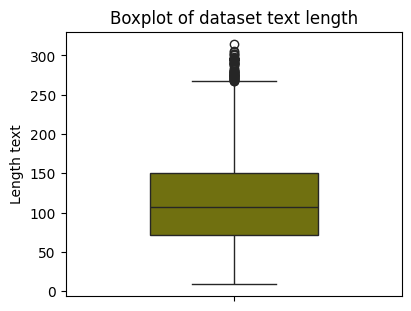

In [9]:
fig=plt.figure(figsize=(4,3),constrained_layout=True)
figure=sns.boxplot(dataset['length_text'],color='olive',width=0.5)
figure.set(ylabel='Length text',title='Boxplot of dataset text length')
plt.savefig('Boxplot_datasetTextLength.png',dpi=300)
plt.show()

##### Histograma

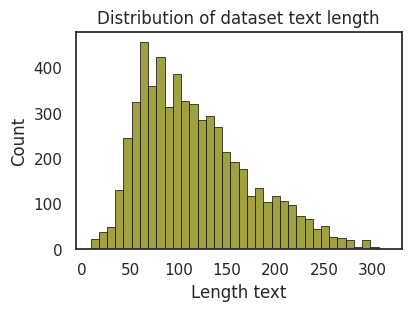

In [10]:
fig=plt.figure(figsize=(4,3),constrained_layout=True)
sns.set_theme(style='white')
figure=sns.histplot(dataset['length_text'],color='olive',ec='k')
figure.set(xlabel='Length text',ylabel='Count',title='Distribution of dataset text length')
plt.savefig('Histogram_datasetTextLength.png',dpi=300)
plt.show()
#

### - Length of the text by group:
We classify the text by sentiment and obtain the length of the text:

/tmp/ipykernel_105894/1581973228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure=sns.boxplot(x=dataset['Sentiment'],y=dataset['Sentence'].apply(len),order=dataset['Sentiment'].value_counts(ascending=False).index,width=0.5,palette="CMRmap_r",saturation=0.9)


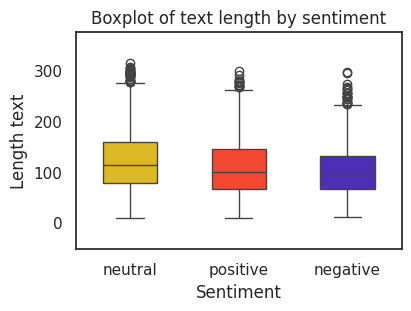

In [27]:
fig=plt.figure(figsize=(4,3),constrained_layout=True)
figure=sns.boxplot(x=dataset['Sentiment'],y=dataset['Sentence'].apply(len),order=dataset['Sentiment'].value_counts(ascending=False).index,width=0.5,palette="CMRmap_r",saturation=0.9)
figure.set(ylabel='Length text',title='Boxplot of text length by sentiment')
figure.margins(y=0.2)

plt.savefig('Boxplot_groupTextLength.png',dpi=300)
#plt.show()


### Words most common:

In [25]:
def dataset_token(dataset):
    dataset_tokens = []
    stopwords = nltk.corpus.stopwords.words('english')
    #print(stopwords)
    for entry in dataset['Sentence']:
        tokens = nltk.tokenize.word_tokenize(entry) 
        word_norm=[word.lower() for word in tokens if word.isalpha()]
        
        rows=[word for word in word_norm if word not in stopwords]
        dataset_tokens.append(rows)
    return dataset_tokens

def words_common(dataset_tokens,n):
    words_only=[]
    for entry in dataset_tokens:
        words_only.extend(entry)
    freq_dist=nltk.FreqDist(words_only)
    words = freq_dist.most_common(n)
    return words
tokens=dataset_token(dataset)

words_commons_dataset=words_common(tokens,100)
words_commons_dataset


[('eur', 1284),
 ('company', 807),
 ('mn', 729),
 ('profit', 568),
 ('sales', 560),
 ('finnish', 527),
 ('said', 516),
 ('net', 499),
 ('million', 493),
 ('operating', 371),
 ('mln', 349),
 ('period', 331),
 ('year', 330),
 ('group', 323),
 ('finland', 318),
 ('quarter', 311),
 ('share', 283),
 ('new', 274),
 ('oyj', 250),
 ('business', 246),
 ('first', 240),
 ('market', 230),
 ('shares', 229),
 ('loss', 220),
 ('also', 211),
 ('compared', 199),
 ('today', 198),
 ('services', 194),
 ('euro', 192),
 ('helsinki', 168),
 ('corresponding', 158),
 ('per', 150),
 ('operations', 150),
 ('percent', 144),
 ('total', 144),
 ('contract', 143),
 ('http', 139),
 ('financial', 135),
 ('price', 133),
 ('https', 132),
 ('bank', 131),
 ('decreased', 131),
 ('nokia', 126),
 ('hel', 124),
 ('products', 123),
 ('stock', 122),
 ('corporation', 118),
 ('according', 115),
 ('pct', 115),
 ('capital', 114),
 ('production', 113),
 ('increased', 109),
 ('mobile', 108),
 ('plant', 107),
 ('last', 105),
 ('compani

#### Figure of distribution of the words of Full Dataset

/tmp/ipykernel_105894/659067884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df, palette="CMRmap_r",saturation=0.9)


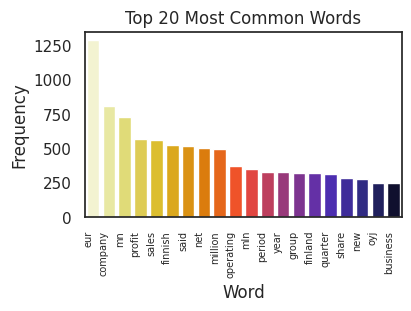

In [26]:

def plot_word_histogram(frequencies, top_n):
    sorted_frequencies = sorted(frequencies, key=lambda x: x[1], reverse=True)
    top_words, top_counts = zip(*sorted_frequencies[:top_n])
    df = pd.DataFrame({'Word': top_words, 'Frequency': top_counts})

    fig=plt.figure(figsize=(4,3),constrained_layout=True)
    sns.barplot(x='Word', y='Frequency', data=df, palette="CMRmap_r",saturation=0.9)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Common Words')
    plt.xticks(rotation=90, ha='right',fontsize=7)
    plt.savefig('plot_word_distribution.png')

# Example of usage
name_file='distribution_words'
plot_word_histogram(words_commons_dataset, top_n=20)


#### Distribution of the adjetives for positive sentiment:

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/leidy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/tmp/ipykernel_105894/659067884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df, palette="CMRmap_r",saturation=0.9)


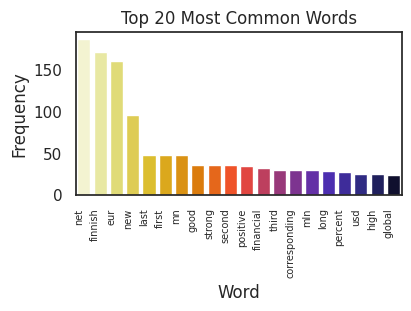

In [39]:
nltk.download('averaged_perceptron_tagger')
def extract(dataset,sentiment):
    grouped=dataset.groupby(dataset.Sentiment)
    type_sentiment=grouped.get_group(sentiment)
    #TLsentiment = type_sentiment['Sentence'].apply(len)
    return type_sentiment
def adjetives_dataset(dataset_tokens):
    new_col=[]
    for linha in tokens:
        #norm_words=[word.lower() for word in linha if word.isalpha()]
        ps_tagger=nltk.pos_tag(linha)
        n_adj=[i[0] for i in ps_tagger if i[1]=='JJ']
        new_col.append(n_adj)
    return new_col

positive = extract(dataset,'positive')
tokens=dataset_token(positive)
dataset_adjetives = adjetives_dataset(tokens)
#print(dataset_adjetives)
words_commons_dataset=words_common(dataset_adjetives,100)
#words_commons_dataset
name_file='distribution_adjetives_positive'
plot_word_histogram(words_commons_dataset, top_n=20)

#### Distribution of the adjetives for negative sentiment:

/tmp/ipykernel_105894/659067884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df, palette="CMRmap_r",saturation=0.9)


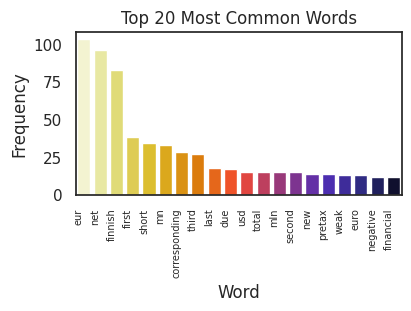

In [40]:
negative = extract(dataset,'negative')
tokens=dataset_token(negative)
dataset_adjetives = adjetives_dataset(tokens)
#print(dataset_adjetives)
words_commons_dataset=words_common(dataset_adjetives,100)
#words_commons_dataset
name_file='distribution_adjetives_negative'
plot_word_histogram(words_commons_dataset, top_n=20)

#### Distribution of the adjetives for neutral sentiment:

/tmp/ipykernel_105894/659067884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df, palette="CMRmap_r",saturation=0.9)


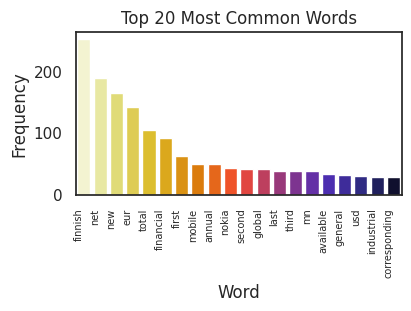

In [41]:
neutral = extract(dataset,'neutral')
tokens=dataset_token(neutral)
dataset_adjetives = adjetives_dataset(tokens)
#print(dataset_adjetives)
words_commons_dataset=words_common(dataset_adjetives,100)
#words_commons_dataset
name_file='distribution_adjetives_neutral'
plot_word_histogram(words_commons_dataset, top_n=20)

## b) Cleaning up data:

### - Removing the repeated rows:

In [14]:
dataset = dataset.drop_duplicates(keep='last')

### - Tokenizing and removing the stop words:

In [15]:
nltk.download('wordnet')
texts = dataset['Sentence']
labels = dataset['Sentiment']

# Função para normalizar os textos
def normalize(text):
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text.lower())

    # Filtrar palavras
    filtered_words = [word for word in tokens if word not in stopwords and word.isalpha()]

    # Lematização
    lemma = nltk.WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(word) for word in filtered_words]
    return lemmatized

x=dataset['Sentence'].apply(normalize)
x

[nltk_data] Downloading package wordnet to /home/leidy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [geosolutions, technology, leverage, benefon, ...
1                       [esi, low, bk, real, possibility]
2       [last, quarter, componenta, net, sale, doubled...
3       [according, chamber, commerce, major, construc...
4       [swedish, buyout, firm, sold, remaining, perce...
                              ...                        
5837    [rising, cost, forced, packaging, producer, hu...
5838    [nordic, walking, first, used, summer, trainin...
5839    [according, shipping, company, viking, line, e...
5840    [building, home, improvement, trade, sale, dec...
5841    [helsinki, afx, kci, konecranes, said, order, ...
Name: Sentence, Length: 5836, dtype: object

In [16]:
import tensorflow as tf

2023-12-01 02:47:54.589775: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 02:48:00.543758: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 02:48:00.548428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 02:48:19.315621: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
